# author: Federica Bianco (@fedhere)

Notebook with examples of how to read and plot cenusus data in python



In [1]:
!pip install census

In [2]:
!pip install us


     |████████████████████████████████| 133kB 4.1MB/s 
  Created wheel for us: filename=us-2.0.2-cp36-none-any.whl size=11927 sha256=86312a80aae5cb8e3d465dd48fbd6ae53a62990893b7edaebd771b03f2c9ee2b
  Stored in directory: /root/.cache/pip/wheels/e2/16/45/6453383ffa495670f0f6b80a3e697a9771d98cfbaf8b451e73
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp36-cp36m-linux_x86_64.whl size=74742 sha256=4916852b3eeb5b27384470471e7c54b9916a1b5c5deb93f0a91457833f124702
  Stored in directory: /root/.cache/pip/wheels/9c/6f/33/92bb9a4b4562a60ba6a80cedbab8907e48bc7a8b1f369ea0ae
Successfully built us jellyfish


In [3]:
!pip install geopandas
!pip install descartes

     |████████████████████████████████| 931kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 226kB/s 
     |████████████████████████████████| 10.9MB 47.2MB/s 


In [13]:
!pip install CensusData


     |████████████████████████████████| 23.2MB 1.4MB/s 
  Created wheel for CensusData: filename=CensusData-1.7-cp36-none-any.whl size=24706084 sha256=897f16a781d3f91a177b0f7dd54fa5641242df26f61431429a350f5960cffbc5
  Stored in directory: /root/.cache/pip/wheels/e8/9e/f9/8d0b054be9981c6f675630de9f32ce59620f8b515c13542a4c
Successfully built CensusData


In [4]:
import pandas as pd
import numpy as np
import pylab as plt
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [68]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!cd /content/gdrive/My\ Drive

In [0]:
!mkdir UDCOVIDhack

In [0]:
!cd UDCOVIDhack

# getting shapefile for PUMA geometries

you can use the geopandas function plot. What is the appropriate plot to just show the shape of the PUMA regions? A choropleth could be ok, but it is better to just draw the contours of the region, since we do not want to highlight some regions over others by color choices.

(Note: a while ago I wrote a quick function that plots choropleths and maps of NYC specifically putting legends and colorbars in the empty spaces taking advantage of the shape of the city and you are welcome to use it: https://github.com/fedhere/choroplethNYC.)

Your map should look someting like:

# example of reading broadband access data at the county level.

## read about the census API

In [0]:
myAPIkey = '32585fc54907adb77ef4407ca484d5bd578f0fd8'

In [0]:
# modules to get census data
import censusdata
from census import Census
from us import states
c = Census(myAPIkey)


In [16]:
censusdata.search('acs1', 2018,'concept', 'internet')


[('B28002_001E',
  'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
  'Estimate!!Total'),
 ('B28002_002E',
  'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
  'Estimate!!Total!!With an Internet subscription'),
 ('B28002_003E',
  'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
  'Estimate!!Total!!With an Internet subscription!!Dial-up with no other type of Internet subscription'),
 ('B28002_004E',
  'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_005E',
  'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
  'Estimate!!Total!!With an Internet subscription!!Cellular data plan'),
 ('B28002_006E',
  'PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD',
  'Estimate!!Total!!With an Internet subscription!!Cellular data plan!!Cellular data plan with no other type of Internet subscription'),
 ('B28002_007E',
  'PRESENCE AND TYPES OF INTERNET SU

pick the estmiated total and the number of households and the number of households

'B28003_001E',
  'PRESENCE OF A COMPUTER AND TYPE OF INTERNET SUBSCRIPTION IN HOUSEHOLD',
  'Estimate!!Total'

and 

'B28003_004E',
  'PRESENCE OF A COMPUTER AND TYPE OF INTERNET SUBSCRIPTION IN HOUSEHOLD',
  'Estimate!!Total!!Has a computer!!With a broadband Internet subscription'


In [20]:

censusdata.printtable(censusdata.censustable('acs1', 2018, 'B28003')), 


Variable     | Table                          | Label                                                    | Type 
-------------------------------------------------------------------------------------------------------------------
B28003_001E  | PRESENCE OF A COMPUTER AND TYP | !! Estimate Total                                        | int  
B28003_002E  | PRESENCE OF A COMPUTER AND TYP | !! !! Estimate Total Has a computer                      | int  
B28003_003E  | PRESENCE OF A COMPUTER AND TYP | !! !! !! Estimate Total Has a computer With dial-up Inte | int  
B28003_004E  | PRESENCE OF A COMPUTER AND TYP | !! !! !! Estimate Total Has a computer With a broadband  | int  
B28003_005E  | PRESENCE OF A COMPUTER AND TYP | !! !! !! Estimate Total Has a computer Without an Intern | int  
B28003_006E  | PRESENCE OF A COMPUTER AND TYP | !! !! Estimate Total No computer                         | int  
---------------------------------------------------------------------------------------------

get the state code

In [21]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs1', 2018)


{'Alabama': censusgeo((('state', '01'),)),
 'Alaska': censusgeo((('state', '02'),)),
 'Arizona': censusgeo((('state', '04'),)),
 'Arkansas': censusgeo((('state', '05'),)),
 'California': censusgeo((('state', '06'),)),
 'Colorado': censusgeo((('state', '08'),)),
 'Connecticut': censusgeo((('state', '09'),)),
 'Delaware': censusgeo((('state', '10'),)),
 'District of Columbia': censusgeo((('state', '11'),)),
 'Florida': censusgeo((('state', '12'),)),
 'Georgia': censusgeo((('state', '13'),)),
 'Hawaii': censusgeo((('state', '15'),)),
 'Idaho': censusgeo((('state', '16'),)),
 'Illinois': censusgeo((('state', '17'),)),
 'Indiana': censusgeo((('state', '18'),)),
 'Iowa': censusgeo((('state', '19'),)),
 'Kansas': censusgeo((('state', '20'),)),
 'Kentucky': censusgeo((('state', '21'),)),
 'Louisiana': censusgeo((('state', '22'),)),
 'Maine': censusgeo((('state', '23'),)),
 'Maryland': censusgeo((('state', '24'),)),
 'Massachusetts': censusgeo((('state', '25'),)),
 'Michigan': censusgeo((('stat

get the data at county granularity. Tract granularity is not available for this data in this survey

In [24]:
households = censusdata.download('acs1', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B28003_001E"])
bbhouseholds = censusdata.download('acs1', 2018,
                             censusdata.censusgeo([('state', '10'), 
                                                   ('county', '*')]),
                             ["B28003_004E"])

bbhouseholds                                  

,B28003_004E
"Kent County, Delaware: Summary level: 050, state:10> county:001",57421
"New Castle County, Delaware: Summary level: 050, state:10> county:003",187641
"Sussex County, Delaware: Summary level: 050, state:10> county:005",77971


In [29]:
bbDEcounty = bbhouseholds.merge(households, left_index=True, right_index=True)
bbDEcounty

,B28003_004E,B28003_001E
"Kent County, Delaware: Summary level: 050, state:10> county:001",57421,67841
"New Castle County, Delaware: Summary level: 050, state:10> county:003",187641,206351
"Sussex County, Delaware: Summary level: 050, state:10> county:005",77971,93479


In [0]:
bbDEcounty["broadband_fraction"] = bbDEcounty.B28003_004E / bbDEcounty.B28003_001E

In [52]:
#manipulate index to extract the county
bbDEcounty["county"] = bbDEcounty.index.astype(str).map(lambda x: x.split(":")[-1])
bbDEcounty

,B28003_004E,B28003_001E,broadband_fraction,county
"Kent County, Delaware: Summary level: 050, state:10> county:001",57421,67841,0.846406,001
"New Castle County, Delaware: Summary level: 050, state:10> county:003",187641,206351,0.909329,003
"Sussex County, Delaware: Summary level: 050, state:10> county:005",77971,93479,0.834102,005


In [30]:
# tract would be ideal
#!wget https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip

--2020-05-08 12:20:57--  https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_10_tract.zip
Resolving www2.census.gov (www2.census.gov)... 104.102.213.232, 2600:1402:800:28b::208c, 2600:1402:800:2aa::208c
Connecting to www2.census.gov (www2.census.gov)|104.102.213.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2018_10_tract.zip’

tl_2018_10_tract.zi     [  <=>               ] 997.34K  4.73MB/s    in 0.2s    

2020-05-08 12:20:57 (4.73 MB/s) - ‘tl_2018_10_tract.zip’ saved [1021272]



In [32]:
# getting the map
!wget https://www2.census.gov/geo/tiger/TIGER2018/COUNTY/tl_2018_us_county.zip


--2020-05-08 12:23:23--  https://www2.census.gov/geo/tiger/TIGER2018/COUNTY/tl_2018_us_county.zip
Resolving www2.census.gov (www2.census.gov)... 23.192.94.146, 2600:1402:800:2aa::208c, 2600:1402:800:28b::208c
Connecting to www2.census.gov (www2.census.gov)|23.192.94.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘tl_2018_us_county.zip.1’

tl_2018_us_county.z     [             <=>    ]  75.55M  30.1MB/s    in 2.5s    

2020-05-08 12:23:25 (30.1 MB/s) - ‘tl_2018_us_county.zip.1’ saved [79219478]



In [34]:
!unzip tl_2018_us_county.zip

Archive:  tl_2018_us_county.zip
 extracting: tl_2018_us_county.cpg   
  inflating: tl_2018_us_county.dbf   
  inflating: tl_2018_us_county.prj   
  inflating: tl_2018_us_county.shp   
  inflating: tl_2018_us_county.shp.ea.iso.xml  
  inflating: tl_2018_us_county.shp.iso.xml  
  inflating: tl_2018_us_county.shx   


In [0]:
# module for mapping; if you are familiar with pandas this should be intuitive
import geopandas as gpd

In [37]:
gde = gpd.GeoDataFrame.from_file("tl_2018_us_county.shp")
gde.shape

(3233, 18)

In [41]:
gde.head()


,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477652222,10690952,+41.9158651,-096.7885168,"POLYGON ((-97.01952 42.00410, -97.01952 42.004..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680956809,61588406,+46.2946377,-123.4244583,"POLYGON ((-123.43639 46.23820, -123.44759 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016819484,29089486,+34.3592729,-104.3686961,"POLYGON ((-104.56739 33.99757, -104.56772 33.9..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169287528,22832516,+40.7835474,-096.6886584,"POLYGON ((-96.91075 40.78494, -96.91075 40.790..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645187,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27367 40.08940, -98.27367 40.089..."


In [44]:
#delaware counties: 
gde[gde.STATEFP == "10"]

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
591,10,003,00217270,10003,New Castle,New Castle County,06,H1,G4020,428,37980,48864,A,1104149852,175376290,+39.5759152,-075.6441324,"POLYGON ((-75.76601 39.73811, -75.76596 39.738..."
1150,10,005,00217269,10005,Sussex,Sussex County,06,H1,G4020,None,41540,None,A,2424543661,674175861,+38.6732275,-075.3370237,"POLYGON ((-75.51631 38.86400, -75.51573 38.865..."
2861,10,001,00217271,10001,Kent,Kent County,06,H1,G4020,428,20100,None,A,1517232133,550433497,+39.0970884,-075.5029819,"POLYGON ((-75.74268 39.07977, -75.74290 39.082..."


In [0]:
allDE = gde[gde.STATEFP == "10"].merge(bbDEcounty, left_on="COUNTYFP", right_on="county")
#allDE = allDE.replace(-666666666.0, np.nan).dropna()


(-75.8292659, -74.9439221, 38.381712799999995, 39.90893519999999)

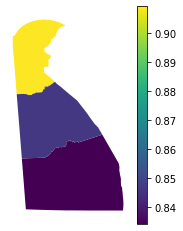

In [54]:
# map it all!
fig = plt.figure()
ax = fig.add_subplot(121)
allDE.plot(column="broadband_fraction", ax=ax, legend=True)
ax.axis('off')


# alternative: use the API directly

#read in in the variables available. the info you need is in the 1year ACS data, we can get broadband at PUMA granularity levell


In [66]:
import requests
import json
import io
url = "https://api.census.gov/data/2016/acs/acs1/variables.json"
resp = requests.request('GET', url)
aff1y = json.loads(resp.text)
aff1y

{'variables': {'for': {'concept': 'Census API Geography Specification',
   'group': 'N/A',
   'label': "Census API FIPS 'for' clause",
   'limit': 0,
   'predicateOnly': True,
   'predicateType': 'fips-for'},
  'in': {'concept': 'Census API Geography Specification',
   'group': 'N/A',
   'label': "Census API FIPS 'in' clause",
   'limit': 0,
   'predicateOnly': True,
   'predicateType': 'fips-in'},
  'B24022_060E': {'attributes': 'B24022_060M,B24022_060EA',
   'group': 'B24022',
   'label': 'Estimate!!Total!!Female!!Service occupations!!Food preparation and serving related occupations',
   'limit': 0,
   'predicateType': 'int'},
  'B19001B_014E': {'attributes': 'B19001B_014M,B19001B_014EA',
   'group': 'B19001B',
   'label': 'Estimate!!Total!!$100,000 to $124,999',
   'limit': 0,
   'predicateType': 'int'},
  'C02014_002E': {'attributes': 'C02014_002M,C02014_002EA',
   'group': 'C02014',
   'label': 'Estimate!!Total!!American Indian tribes, specified',
   'limit': 0,
   'predicateType'

In [0]:
#turning things into arrays to enable broadcasting
#Python3
affkeys = np.array(list(aff1y['variables'].keys()))


In [61]:
#extracting variables of B28002 that contain "broadband"
[(k, aff1y['variables'][k]['label'])  for k in affkeys if k.startswith ("B28002") and 
 'Broadband' in aff1y['variables'][k]['label']]


[('B28002_007E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL'),
 ('B28002_004E',
  'Estimate!!Total!!With an Internet subscription!!Broadband of any type'),
 ('B28002_008E',
  'Estimate!!Total!!With an Internet subscription!!Broadband such as cable, fiber optic or DSL!!Broadband such as cable, fiber optic or DSL with no other type of Internet subscription')]

In [62]:
#keyword for the number of households
keyNhouseholds = 'B28002_001E'
aff1y['variables'][keyNhouseholds]

{'attributes': 'B28002_001M,B28002_001EA',
 'group': 'B28002',
 'label': 'Estimate!!Total',
 'limit': 0,
 'predicateType': 'int'}

In [63]:
keyNBB = 'B28002_004E'
aff1y['variables'][keyNBB]

{'attributes': 'B28002_004M,B28002_004EA',
 'group': 'B28002',
 'label': 'Estimate!!Total!!With an Internet subscription!!Broadband of any type',
 'limit': 0,
 'predicateType': 'int'}

In [67]:
url = "https://api.census.gov/data/2016/acs/acs1?get=" + keyNBB +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPIkey
resp = requests.request('GET', url).content
pumaBB = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

#getting the first row of the table: the total number of households
url = "https://api.census.gov/data/2016/acs/acs1?get="  + keyNhouseholds +\
",NAME&for=public%20use%20microdata%20area:*&in=state:36&key=" + myAPIkey
resp = requests.request('GET', url).content
pumaPP = pd.read_csv(io.StringIO(resp.decode('utf-8').replace('[','').replace(']','')))

pumaPP.head()

,B28002_001E,NAME,state,public use microdata area,Unnamed: 4
0,47005,Monroe County (Central)--Rochester City (East)...,36,902,NaN
1,37435,Monroe County (Central)--Rochester City (West)...,36,903,NaN
2,53507,Monroe County (Central)--Greece & Gates Towns ...,36,904,NaN
3,39808,"Monroe County (North & West) PUMA, New York",36,905,NaN
4,66902,"Monroe County (South) PUMA, New York",36,906,NaN


more examples here https://github.com/fedhere/PUI2018_fb55/blob/master/HW7_fb55/geopandas_census_solution.ipynb